<h1>Find and display correlation between time of post and sentiment</h1>

<p>Imports and collect tweets</p>

In [36]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator
import csv
from datetime import datetime, timedelta
import math

tweets = []

with open('Tweets.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
    next(reader)
    for row in reader:
        filtered_row = [row[1], row[2], row[12], row[5]]
        tweets.append(filtered_row)

<p>Create a dictionary with datetime object keys using 5 minute intervals for every hour of the day</p>

In [41]:
# get list of tweet_sentiment and times

def get_time(tweet):
    time_str = tweet[2][:-6]
    time = datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
    time = time.replace(year=1900, month=1, day=1)
    return time

# normalize different time zones to the same one
def get_day(tweet):
    day_str = tweet[2][:-6]
    day = datetime.strptime(day_str, '%Y-%m-%d %H:%M:%S')
    day = day.replace(hour=0, minute=0, second=0)
    return day

# populate a dictionary with datetime objects representing
# 5 minute intervals from 00:00 to 23:55
# dictionary storing two other dictionaries: sentiments at intervals throughout the day, sentiments at certain days
airline_data = {"US Airways": [{}, {}], "Virgin America": [{}, {}], "Southwest": [{}, {}], "United" : [{}, {}], "American": [{}, {}], "Delta": [{}, {}]}
sentiment_time_dict = {}
sentiment_day_dict = {}
minute_interval = 30
i = datetime.strptime('00:00', '%H:%M')
terminate = datetime.strptime('23:55', '%H:%M')

# add 5 minute intervals to sentiment_time_dict
for airline in airline_data:
    i = datetime.strptime('00:00', '%H:%M')
    while i <= terminate:
        airline_data[airline][0][i] = [0, 0]
        i += timedelta(minutes=minute_interval)

<p>Iterate through tweets to extract time of posting and sentiment</p>

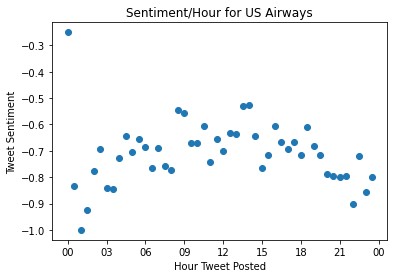

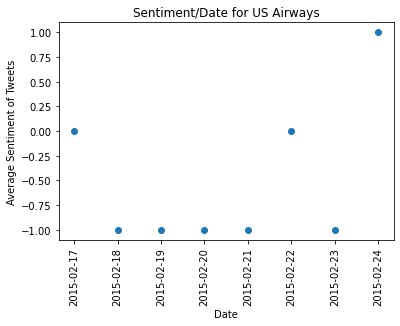

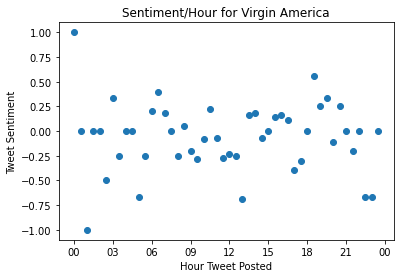

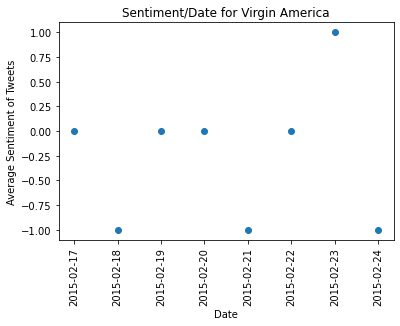

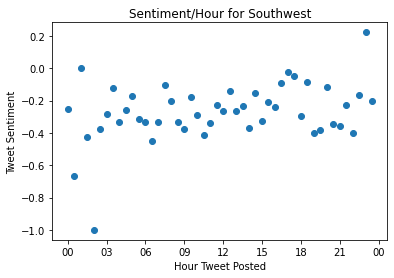

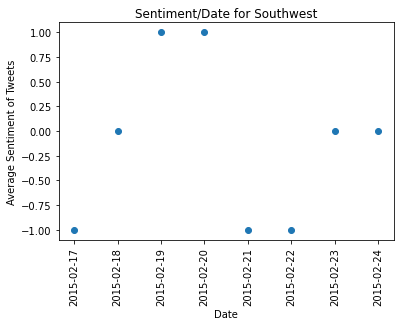

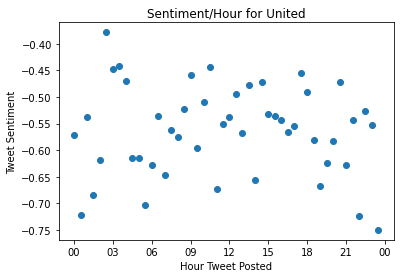

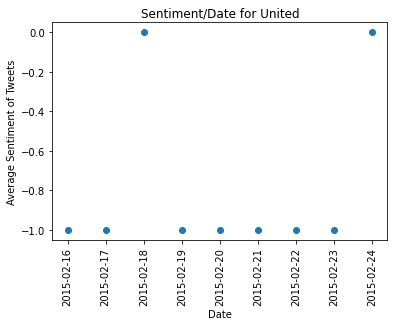

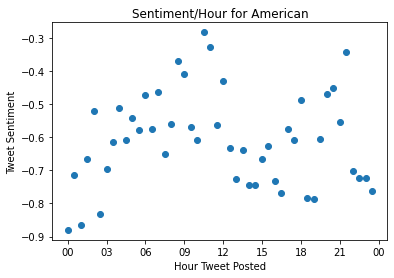

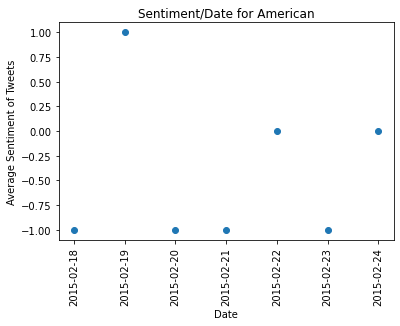

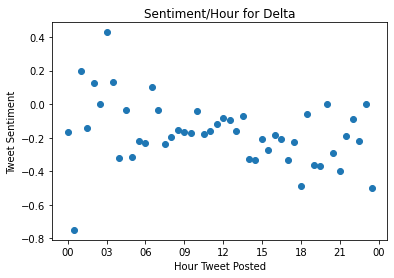

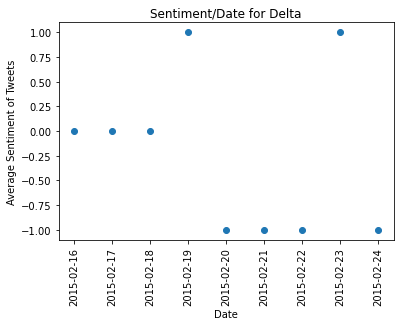

In [42]:
# get the tweet's time, identify nearest entry in dictionary
# and add to the dict entry's sentiment sum and tweet count
for tweet in tweets:
    tweet_time = get_time(tweet)
    # how to find nearest window
    time_window = tweet_time.replace(minute= tweet_time.minute - (tweet_time.minute % minute_interval), second=0)
    day = get_day(tweet)
    # access appropriate list of dicts of the airline
    # first dict in list is the time/sentiment dict
    # use the tweet's time window as the key, access the second item in the correspodning list
    # this counts the number of tweets in this window
    airline_data[tweet[3]][0][time_window][1] += 1
    if tweet[0] == 'positive':
        if day in sentiment_day_dict:
            airline_data[tweet[3]][1][day][0] += 1
            airline_data[tweet[3]][1][day][1] += 1
        else:
            airline_data[tweet[3]][1][day] = [1, 1]
            
        # update sentiment sum of the time/sentiment dictionary
        airline_data[tweet[3]][0][time_window][0] += 1
    elif tweet[0] == 'negative':
        
        if day in sentiment_day_dict:
            airline_data[tweet[3]][1][day][0] -= 1
            airline_data[tweet[3]][1][day][1] += 1
        else:
            airline_data[tweet[3]][1][day] = [-1, 1]        

            # update sentiment sum of the time/sentiment dictionary
        airline_data[tweet[3]][0][time_window][0] -= 1
    else:
        if day in sentiment_day_dict:
            airline_data[tweet[3]][1][day][1] += 1
        else:
            airline_data[tweet[3]][1][day] = [0, 1]

for airline in airline_data:

    times = list(airline_data[airline][0].keys())
    days = list(airline_data[airline][1].keys())
    # get a list of the mean sentiments for each five minute window
    day_sentiments = []
    time_sentiments = []
    for time in airline_data[airline][0]:
        # if at least 1 tweet in this window
        if airline_data[airline][0][time][1] != 0:
            time_sentiments.append(airline_data[airline][0][time][0] / airline_data[airline][0][time][1])
        # if no tweets in this period
        else:
            time_sentiments.append(0)

    for day in airline_data[airline][1]:
        if airline_data[airline][1][day][1] != 0:
            day_sentiments.append(airline_data[airline][1][day][0] / airline_data[airline][1][day][1])
        else:
            day_sentiments.append(0)

    min_time = datetime.strptime('00:00', '%H:%M')
    max_time = datetime.strptime('00:00 02-01-1900', '%H:%M %d-%m-%Y')

    (fig, ax) = plt.subplots(1, 1)
    ax.scatter(times, time_sentiments)
    ax.xaxis.set_major_formatter(DateFormatter('%H'))
    ax.set_xlabel('Hour Tweet Posted')
    ax.set_ylabel('Tweet Sentiment')
    plt.title('Sentiment/Hour for ' + airline)
    plt.show()

    (fig2, ax2) = plt.subplots(1, 1)
    ax2.scatter(days, day_sentiments)
    plt.xticks(rotation=90)
    plt.title('Sentiment/Date for ' + airline)
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Average Sentiment of Tweets")
    plt.show()